In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras

/home/boti/anaconda3/envs/deep/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/boti/anaconda3/envs/deep/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/boti/anaconda3/envs/deep/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/boti/anaconda3/envs/deep/lib/python3.7/site-packages

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import load_model

### MNIST DATASET

In [6]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

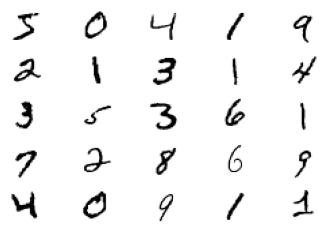

In [7]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

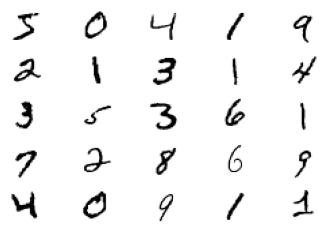

In [8]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train[0] #single image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_train_subset = X_train[:2000]

In [14]:
X_train_subset.shape

(2000, 28, 28, 1)

In [15]:
y_train.shape

(60000,)

In [16]:
y_train = to_categorical(y_train, num_classes=10) # one-hot-encode the target variable; final layer will have 10 neurons

In [17]:
y_train.shape

(60000, 10)

In [18]:
y_train_subset = y_train[:2000]

In [19]:
y_train_subset.shape

(2000, 10)

In [33]:
clear_session()

In [34]:
m = Sequential([
    Conv2D(8, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28,28,1)),
    Conv2D(8, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2), padding = 'same'),
    Dropout(0.2),
    Conv2D(16, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
    Conv2D(16, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),    
    MaxPooling2D(pool_size = (2,2), padding = 'same'),
    Dropout(0.2),
    Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
    Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),    
    MaxPooling2D(pool_size = (2,2), padding = 'same'),
    Dropout(0.2),
    Flatten(),
    Dense(units = 200, activation = 'relu'),
    Dense(units = 100, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])
m.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0

In [22]:
#callback = EarlyStopping(monitor='loss', patience=500)

In [35]:
h = m.fit(X_train_subset, y_train_subset, batch_size = 32, epochs= 500, validation_split= 0.8, verbose= 0)

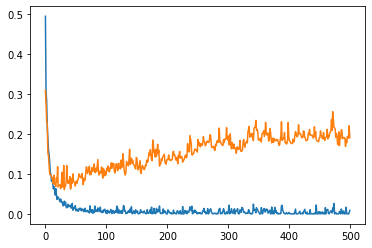

In [38]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

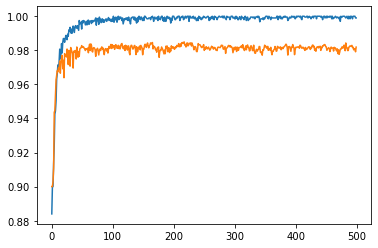

In [39]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

In [43]:
h.history['acc']

[0.88395983,
 0.8997494,
 0.9000001,
 0.91353375,
 0.92431074,
 0.94260645,
 0.94436085,
 0.950376,
 0.96315795,
 0.966416,
 0.9714285,
 0.96867186,
 0.9734337,
 0.98070174,
 0.9749375,
 0.9776943,
 0.9839599,
 0.9784461,
 0.98471177,
 0.9869674,
 0.9867168,
 0.9847117,
 0.9867169,
 0.9887218,
 0.98797005,
 0.9862156,
 0.98947364,
 0.9882206,
 0.99198,
 0.9914786,
 0.9934837,
 0.99022555,
 0.9924811,
 0.9899749,
 0.99197984,
 0.9942355,
 0.99323314,
 0.99047625,
 0.99373436,
 0.9944862,
 0.993233,
 0.9929824,
 0.9944862,
 0.9929823,
 0.9917294,
 0.99749374,
 0.99548876,
 0.99599,
 0.99649125,
 0.9924811,
 0.9972431,
 0.99599,
 0.99749374,
 0.9972431,
 0.99699247,
 0.9949875,
 0.99498737,
 0.99699247,
 0.9949875,
 0.99749374,
 0.9977444,
 0.995238,
 0.99699235,
 0.997243,
 0.9972431,
 0.99573934,
 0.99749374,
 0.99649125,
 0.99699247,
 0.99749374,
 0.9972431,
 0.99799496,
 0.9989975,
 0.99473673,
 0.9987469,
 0.99749374,
 0.99849623,
 0.9952381,
 0.9994987,
 0.9977443,
 0.99824566,
 0.9

In [41]:
m.evaluate(X_train_subset, y_train_subset)

2000/2000 [==============================] - 0s 196us/sample - loss: 0.1528 - acc: 0.9855


[0.15279052901566065, 0.9854999]

In [28]:
# serialize model
#m.save("acc99.h5")
#print("Saved model to disk")

In [46]:
m2 = load_model('acc99.h5', compile = False)

In [48]:
m2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
h = m2.fit(X_train_subset, y_train_subset, batch_size = 32, epochs= 200, validation_split= 0.8, verbose= 0)

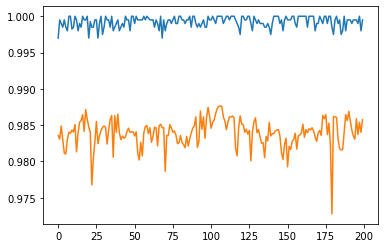

In [53]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

In [54]:
h.history['acc']

[0.99699247,
 0.9994987,
 0.99899745,
 0.99849623,
 0.9994987,
 0.99849623,
 0.99799496,
 1.0,
 1.0,
 0.9982456,
 0.9984963,
 1.0,
 0.9994987,
 0.99799496,
 0.9989975,
 0.99849623,
 1.0,
 0.9994987,
 0.9994987,
 1.0,
 0.9969925,
 0.99924815,
 0.99849623,
 0.99849623,
 0.9994987,
 0.9994987,
 0.9969925,
 0.9989975,
 1.0,
 0.99749374,
 0.99849623,
 1.0,
 0.9994987,
 0.9994987,
 0.99849623,
 1.0,
 0.997995,
 0.9984963,
 0.99899745,
 0.9994987,
 0.99799496,
 0.9984963,
 0.99899745,
 0.9984963,
 1.0,
 0.9994987,
 0.9994987,
 0.99799496,
 1.0,
 1.0,
 0.99899745,
 1.0,
 0.9994987,
 0.9994987,
 0.9994987,
 0.9994987,
 1.0,
 0.9994987,
 1.0,
 0.99974936,
 0.9994987,
 0.9994987,
 0.9994987,
 0.99849623,
 0.9994987,
 0.9989975,
 0.997995,
 1.0,
 0.99699247,
 0.9994987,
 0.99799496,
 0.99899745,
 0.9994987,
 0.9994987,
 0.9989975,
 0.9994987,
 1.0,
 0.99899745,
 0.9989975,
 1.0,
 1.0,
 0.9994987,
 0.9994987,
 0.9989975,
 0.9994987,
 0.9994987,
 1.0,
 0.99849623,
 1.0,
 1.0,
 0.9989975,
 0.99849623

In [52]:
m2.evaluate(X_train_subset, y_train_subset)

2000/2000 [==============================] - 0s 200us/sample - loss: 0.1184 - acc: 0.9886


[0.11842114288184259, 0.9885999]